In [1]:
# 1. 평균 제곱 오차 함수

import numpy as np

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
y2 =np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

def mean_squared_error(y, t):
  """평균제곱오차mean squared error,MSE
  """
  return 0.5 * np.sum((y-t)**2)

print("y: ", y)
print("t: ", t)
print("mean_squared_error(y,t): ", mean_squared_error(y,t))
print("y2: ", y2)
print("mean_squared_error(y2,t): ", mean_squared_error(y2,t))

y:  [0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]
t:  [0 0 1 0 0 0 0 0 0 0]
mean_squared_error(y,t):  0.09750000000000003
y2:  [0.1  0.05 0.1  0.   0.05 0.1  0.   0.6  0.   0.  ]
mean_squared_error(y2,t):  0.5975


In [2]:
# 2. 교차 엔트로피 오차 함수

def cross_entropy_error(y, t):
  """교차 엔트로피 오차cross entropy error,CEE
  """
  delta = 1e-7 # np.log(0)을 피하기 위하여 작은 값을 더해준다.
  return -np.sum(t * np.log(y + delta))

print("y: ", y)
print("t: ", t)
print("cross_entropy_error(y,t): ", cross_entropy_error(y,t))
print("y2: ", y2)
print("cross_entropy_error(y2,t): ", cross_entropy_error(y2,t))

y:  [0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]
t:  [0 0 1 0 0 0 0 0 0 0]
cross_entropy_error(y,t):  0.510825457099338
y2:  [0.1  0.05 0.1  0.   0.05 0.1  0.   0.6  0.   0.  ]
cross_entropy_error(y2,t):  2.302584092994546


In [3]:
# 3. 미니 배치mini batch를 위한 데이터 준비

import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print("x_train.shape: ", x_train.shape) # (60000, 784)
print("t_train.shape: ", t_train.shape) # (60000, 10)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print("train_size: ", train_size) # 60000
print("batch_size: ", batch_size) # 10
print("batch_mask: ", batch_mask) # ex) [31058 14801 39118 28351 40226  4235 58415 52323 35472 52556]

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print("x_batch: ", x_batch)
print("t_batch: ", t_batch)



x_train.shape:  (60000, 784)
t_train.shape:  (60000, 10)
train_size:  60000
batch_size:  10
batch_mask:  [25009 54310 39133 12196 55802 18659 44512  6390 43105 13914]
x_batch:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
t_batch:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:
# 4. 배치용 교차 엔트로피 오차

import pickle

def sigmoid(x):
    """시그모이드 함수
    """
    return 1 / (1 + np.exp(-x))

def softmax(x):
    """Overflow 문제가 없는 Softmax 함수.
    """
    max_x = np.max(x)
    exp_x = np.exp(x - max_x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

def init_network():
    """신경망 초기화
    """
    with open("d:/dlfs/book1/dataset/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    """추론
    """
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

def cross_entropy_error(y, t):
  """배치용 교차 엔트로피 오차cross entropy error,CEE
  """
  if y.ndim == 1:  # 1차원 numpy배열인 경우 2차원 배열로 변환한다.
      t = t.reshape(1, t.size)
      y = y.reshape(1, y.size)
  delta = 1e-7
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + delta)) / batch_size

network = init_network()
y_batch = predict(network, x_batch)
# print("y_batch: ", y_batch)
print("y_batch.shape: ", y_batch.shape)
print("y_batch.ndim: ", y_batch.ndim)
print("t_batch.shape: ", t_batch.shape)
print("t_batch.ndim: ", t_batch.ndim)
# print("t_batch: ", t_batch)
print("np.sum(y_batch): ", np.sum(y_batch))
print("np.sum(t_batch): ", np.sum(t_batch))
print("cross_entropy_error(y_batch, t_batch): ", cross_entropy_error(y_batch, t_batch))



y_batch.shape:  (10, 10)
y_batch.ndim:  2
t_batch.shape:  (10, 10)
t_batch.ndim:  2
np.sum(y_batch):  0.99999994
np.sum(t_batch):  10.0
cross_entropy_error(y_batch, t_batch):  3.890196990966797


In [5]:
# 5. 배치용 교차 엔트로피 오차, 원핫레이블이 아닌 답지의 경우 처리.

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
y_batch = predict(network, x_batch)

def cross_entropy_error_not_onehot(y, t):
  """원핫레이블 답지가 아닌 경우의 배치용 교차 엔트로피 오차cross entropy error,CEE
  """
  if y.ndim == 1:  # 1차원 numpy배열인 경우 2차원 배열로 변환한다.
      t = t.reshape(1, t.size)
      y = y.reshape(1, y.size)
  delta = 1e-7
  batch_size = y.shape[0]
  # return -np.sum(t * np.log(y + delta)) / batch_size
  # np.arange로 행 데이터 필터링을 하고, 답지 데이터 t로 열 필터링을 하여 정답일 때의 확률(softmax값)을 얻는다.
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

print("t_batch: ", t_batch)
print("t_batch.shape: ", t_batch.shape)
print("t_batch.ndim: ", t_batch.ndim)
print("cross_entropy_error_not_onehot(y_batch, t_batch): ", cross_entropy_error_not_onehot(y_batch, t_batch))

t_batch:  [2 7 5 9 7 2 3 5 4 5]
t_batch.shape:  (10,)
t_batch.ndim:  1
cross_entropy_error_not_onehot(y_batch, t_batch):  3.9788558959960936


In [6]:
# 6. 수치 미분

def numerical_diff(f, x):
  """수치 미분numerical differentiation
  * 반올림 오차rounding error 문제가 있음.
  * 전방 차분.
  """
  h = 1e-50
  return (f(x+h) - f(x)) / h

def numerical_diff(f, x):
  """수치 미분numerical differentiation
  * 반올림 오차 문제를 피하기 위해 차이를 적당히 작은 값 1e-4(0.0001) 로 설정.
  * 중심 차분(중앙 차분)
  """
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2*h)

print("np.float32(1e-4): ", np.float32(1e-4))
print("np.float32(1e-10): ", np.float32(1e-10))
print("np.float32(1e-50): ", np.float32(1e-50))



np.float32(1e-4):  1e-04
np.float32(1e-10):  1e-10
np.float32(1e-50):  0.0


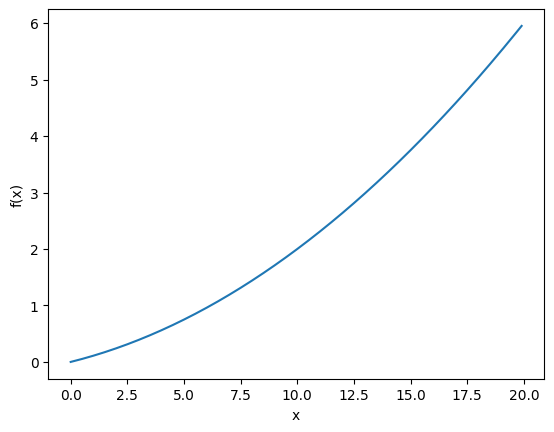

numerical_diff(function1, 5):  0.1999999999990898
numerical_diff(function1, 10):  0.2999999999986347


In [7]:
# 7. 수치 미분 사용

def function1(x):
  return 0.01*x**2 + 0.1*x

import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

print("numerical_diff(function1, 5): ", numerical_diff(function1, 5))
print("numerical_diff(function1, 10): ", numerical_diff(function1, 10))


In [8]:
# 8. 편미분

def function2(x):
  return x[0]**2 + x[1]**2

# x0=3, x1=4일 때 x0에 대한 편미분
def function2_1(x0):
  return x0*x0 + 4.0 ** 2.0
print(numerical_diff(function2_1, 3.0))

# x0=3, x1=4일 때 x1에 대한 편미분
def function2_2(x1):
  return 3.0**.0 + x1*x1
print(numerical_diff(function2_2, 4.0))

def numerical_gradient(f, x):
  """함수 f에 대한 입력배열 x의 기울기gradient를 리턴한다.

  * 입력 배열 x의 개별 항목의 편미분을 모아 리턴한다.
  * 미분은 수치미분으로, 중심차분 방식으로 계산한다.
  """
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x 형상과 같은 배열을 생성한다.
  
  for idx in range(x.size):
    tmp = x[idx]

    # f(x+h): 현재 x입력값에 h를 더한 뒤 함수 결과를 보관한다.
    x[idx] = tmp+h
    y1 = f(x)

    # f(x-h): 현재 x입력값에 h를 뺀 뒤 함수 결과를 보관한다.
    x[idx] = tmp-h
    y2 = f(x)

    grad[idx] = (y1-y2) / (2*h) # f의 현재x에 대한 편미분 값을 저장한다.
    x[idx] = tmp # restore
  
  return grad

6.00000000000378
7.999999999999119


In [9]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

def function_2(x):
  return x[0]**2 + x[1]**2

r1 = gradient_descent(function_2, init_x=np.array([-3.0, 4.0]), lr=0.1, step_num=100)
r2 = gradient_descent(function_2, init_x=np.array([-3.0, 4.0]), lr=10.0, step_num=100) # 학습률이 너무 커서 발산됨.
r3 = gradient_descent(function_2, init_x=np.array([-3.0, 4.0]), lr=1e-10, step_num=100) # 학습률이 너무 작아서 갱신이 안됨.

print("r1: ", r1)
print("r2: ", r2)
print("r3: ", r3)

r1:  [-6.11110793e-10  8.14814391e-10]
r2:  [-2.58983747e+13 -1.29524862e+12]
r3:  [-2.99999994  3.99999992]


In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

assert(callable(softmax) and callable(cross_entropy_error) and callable(numerical_gradient))

class SimpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3) # 랜덤값을 정규분포로 2x3 (0.0~1.0)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

net = SimpleNet()
print("net.W: ", net.W)

x = np.array([0.6, 0.9])
print("x: ", x)

p = net.predict(x)
print("p: ", p)

t = np.array([0, 0, 0])
t[np.argmax(p)] = 1
print("t: ", t)

print("net.loss(x, t): ", net.loss(x, t))



net.W:  [[-0.12049103  0.14827867 -0.07148025]
 [-0.06890872 -1.52687817 -0.81236922]]
x:  [0.6 0.9]
p:  [-0.13431247 -1.28522316 -0.77402045]
t:  [1 0 0]
net.loss(x, t):  0.6118257460593847


In [11]:
def _numerical_gradient_no_batch(f, x):
  """1차원 입력값에 대한 편미분(기울기) 구하기
  """
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x)
  
  for idx in range(x.size):
    tmp = x[idx]
    
    # f(x+h)
    x[idx] = tmp + h
    right = f(x)
    
    # f(x-h)
    x[idx] = tmp - h 
    left = f(x) 
    
    grad[idx] = (right - left) / (2*h)
    x[idx] = tmp
      
  return grad

def numerical_gradient(f, X):
  """1~2차원 입력값에 대한 편미분(기울기) 구하기.
  """
  if X.ndim == 1:
    return _numerical_gradient_no_batch(f, X)
  else:
    grad = np.zeros_like(X)
    
    for idx, x in enumerate(X):
      grad[idx] = _numerical_gradient_no_batch(f, x)
    
    return grad

print("ng1: ", numerical_gradient(lambda x: x[0]**2 + x[1]**2, np.array([1.0, 2.0])))
print("ng2: ", numerical_gradient(lambda x: x[0]**2 + x[1]**2, np.array([[1.0, 2.0], [3.0, 4.0]])))

ng1:  [2. 4.]
ng2:  [[2. 4.]
 [6. 8.]]


In [12]:
def f(W):
  # 주어진 x 입력값으로 내부의 웨이트를 사용해서 추론해서 나온 결과(분류)와 정답지를 손실함수를 보내 나온 값을 리턴한다.
  return net.loss(x, t)

print("net.W.size: ", net.W.size)
print("net.W.shape: ", net.W.shape)
dW = numerical_gradient(f, net.W)

print(dW)

net.W.size:  6
net.W.shape:  (2, 3)
[[-0.27458416  0.10294479  0.17163936]
 [-0.41187624  0.15441719  0.25745905]]


In [13]:
class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    """가중치 초기화
    """
    self.params = {}
    self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params["B1"] = np.zeros(hidden_size)
    self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params["B2"] = np.zeros(output_size)

  def predict(self, x):
    """신경망 추론하기
    """
    w1 = self.params["W1"]
    w2 = self.params["W2"]
    b1 = self.params["B1"]
    b2 = self.params["B2"]

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    y = softmax(a2)

    return y
  
  def loss(self, x, t):
    """손실함수.
    x: 입력 데이터
    y: 정답 레이블(one hot encoding)
    """
    y = self.predict(x)
    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    """추론 점수
    """
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
  
  def numerical_gradient(self, x, t):
    """기울기 구하기
    """
    loss_W = lambda W: self.loss(x, t)
    grads = {}
    grads["W1"] = numerical_gradient(loss_W, self.params["W1"]) # loss_W에서는 loss > predict 까지 호출되면서 W1값을 사용한다. W1값을 변화시킨 결과가 반영된다.
    grads["B1"] = numerical_gradient(loss_W, self.params["B1"])
    grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
    grads["B2"] = numerical_gradient(loss_W, self.params["B2"])
    return grads


In [21]:
net = TwoLayerNet(784, 100, 10)
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, t) # 연산이 오래 걸린다

print("grads[W1].shape: ", grads["W1"].shape) # (784, 100)
print("grads[B1].shape: ", grads["B1"].shape) # (100, )
print("grads[W2].shape: ", grads["W2"].shape) # (100, 10)
print("grads[B2].shape: ", grads["B2"].shape) # (10, )


grads[W1].shape:  (784, 100)
grads[B1].shape:  (100,)
grads[W2].shape:  (100, 10)
grads[B2].shape:  (10,)


In [30]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []
iters_num = 10_000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
iter_per_epoch = max(train_size / batch_size, 1)
network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

for i in range(iters_num):
  # 미니배치용 데이터 준비.
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 얻기.
  grad = network.numerical_gradient(x_batch, t_batch)
  # grad = network.gradient(x_batch, t_batch) # 오차역전파법을 이용해 기울기를 구하는 함수. 다음 장에서 학습 예정.

  # 기울기를 이용해 경사하강법으로 손실함수의 결과값을 줄이는 방향으로 각 파라미터(가중치와 편향) 조정하기.
  for key in ("W1", "B1", "W2", "B2"):
    # 기울기 값이 음수면 손실함수의 결과가 0으로 향하기 위해 더해줌.
    network.params[key] -= learning_rate * grad[key]
  
  # 학습경과를 파악하기 위해
  # 수정된 파라미터를 통해 손실함수를 계산하고 그 결과를 보관하기.
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_accuracy = network.accuracy(x_train, t_train)
    test_accuracy  = network.accuracy(x_test, t_test)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    print(f"train_accuracy: {train_accuracy}, test_accuracy: {test_accuracy}")
  print(f"iter {i} => loss:{loss}")
  


train_accuracy: 0.09683333333333333, test_accuracy: 0.0956
iter 0 => loss:6.908298578079582
iter 1 => loss:6.90663292352316
iter 2 => loss:6.907999428183607
iter 3 => loss:6.913297688647029
iter 4 => loss:6.905910704355063
iter 5 => loss:6.903913897332181
iter 6 => loss:6.908967846241012
iter 7 => loss:6.901031255192367
iter 8 => loss:6.912688997654141
iter 9 => loss:6.9058613211416
iter 10 => loss:6.898985240950246
iter 11 => loss:6.90737180554064
iter 12 => loss:6.911422466075049
iter 13 => loss:6.904599747107202
iter 14 => loss:6.901243291231985
iter 15 => loss:6.910058972457287
iter 16 => loss:6.907307503266909
iter 17 => loss:6.906316836182791
iter 18 => loss:6.901990170052309
iter 19 => loss:6.901141667171782
iter 20 => loss:6.90454463785775


KeyboardInterrupt: 